### Exercise 2: Rejection Method

In [ ]:
#(i)
import numpy as np
from numpy import pi, exp, sqrt
import matplotlib.pyplot as plt

#p(x) = (2/sqrt(2*pi))*exp((-x**2)/2) if x >= 0, 0 otherwise

def p(x):
    return (2/np.sqrt(2*np.pi))*np.exp((-x**2)/2)

x_vals = np.arange(0, 5, 0.1)
plt.plot(x_vals, p(x_vals))

In [ ]:
#(ii)

import matplotlib.pyplot as plt
import numpy as np
# as before, we want to generate random numbers according to the exponential distribution

#p(x) = 2*sqrt(x/pi)*exp(-x) for x>0 (and 0 otherwise)

def p(x):
    return (2/np.sqrt(2*np.pi))*np.exp((-x**2)/2)
    
n = 10000
success = 0
naive_rejection = []

fig = plt.figure()
plt.xlim(0, 8)
plt.ylim(0, 1)

for i in range(n):

    x_value = 8*np.random.rand()
    y_value = np.random.rand()
    # note that we had to cut off the x-values at some point 
    # this introduces an error, but at x=8 the exp. distribution is already very small
    # the y_values are always between 0 and 1 in this case
    
    # we then check if the point lies above or below the exponential distribution curve
    if y_value < p(x_value):
        plt.plot(x_value, y_value, 'r.')
        success += 1
        naive_rejection.append(x_value)
    else:
        # we reject all the points that lie above the distribution curve
        plt.plot(x_value, y_value, 'b.')

x = np.arange(0,5,0.1)
plt.plot(x, p(x))
plt.show()

# the x_values of the points that fall below the curve are indeed exponentially distributed
# this is because we are basically generating the histogram that we want directly
plt.plot(x, p(x), label = 'exact distribution function')
plt.hist(naive_rejection, bins = 20, density = True,\
         alpha = 0.5, label = 'naive rejection method')
plt.legend()
plt.xlim(0,5)
plt.show()

# unfortunately most numbers are above the curve and they are "wasted"
print("Success rate: ", success/n)

In [ ]:
#(iii)
def f(x):
    return np.sqrt(2)*np.exp(-x)

plt.plot(x, p(x))
plt.plot(x, f(x))

In [ ]:
#(iv)


n = 10000
comp_success = 0
better_rejection = []

fig = plt.figure()
plt.xlim(0, 5)
plt.ylim(0, 1)

for i in range(n):


    x_value = np.random.exponential(3/2)
    y_value = f(x_value)*np.random.rand()
    # the y_value is chosen between zero and the diagonal line
    
    # we then check if the point lies above or below the exponential distribution curve
    if y_value < p(x_value):
        plt.plot(x_value, y_value, 'r.')
        comp_success += 1
        better_rejection.append(x_value)
    else:
        # we reject all the points that lie above the distribution curve
        plt.plot(x_value, y_value, 'b.')

x = np.arange(0,5,0.1)
plt.plot(x, p(x))
plt.plot(x,f(x))
plt.axvline(0)
plt.show()

# the x_values of the points that fall below the curve are indeed exponentially distributed
# this is because we are basically generating the histogram that we want directly
plt.plot(x, p(x), label = 'exact distribution function')
plt.hist(better_rejection, bins = 20, density = True,\
         alpha = 0.5, label = 'slightly less naive rejection method')
plt.legend()
plt.xlim(0,5)
plt.axvline(0)
plt.show()

# somewhat fewer numbers are above the curve and are "wasted"
print("Success rate: ", comp_success/n)


In [ ]:
print('Success comparision:\n', 'Success = ', success/n, '\n Comarison Function Success =', comp_success/n)

### Exercise 3: Random Walk

In [ ]:
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt

N = 10000 #number of steps
directions = np.array([[0, 1], [1, 0], [0, 1], [-1, 0], [0, -1]]) #biased to move up more often than other directions.
x50 = np.array([[0, 1], [0, 1], [-1, 0], [0, -1]]) #boundary movement at x = 50
negative_x50 = np.array([[0, 1], [1, 0], [0, 1], [0, -1]]) #boundary movement at x = -50
y50 = np.array([[1, 0],[-1, 0], [0, -1]]) #boundary movement at y = 50
negative_y50 = np.array([[0, 1], [1, 0], [0, 1], [-1, 0]]) #boundary movement at y = -50

coords = np.zeros([N, 2])
limit = np.array([-50., 50.])

fig = plt.figure()
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Up-Biased Random Walk')
plt.xlabel('x')
plt.ylabel('y')

i = 0
rng = nprand.default_rng()
xy = [0, 0]
x = [0]
y = [0]
d = np.zeros([1, 2])
new_x = np.array([])
new_y = np.array([])

while i < N-1:
    step = rng.choice(directions)
    coords[i] += step
    x = sum(coords[:, 0])
    y = sum(coords[:, 1])
    if x <= limit[0]:
        coords[i] += rng.choice(negative_x50)
        continue
    elif x >= limit[1]:
        coords[i] += rng.choice(x50)
        continue
    elif y <= limit[0]:
        coords[i] += rng.choice(negative_y50)
        continue
    elif y >= limit[1]:
        coords[i] += rng.choice(y50)
        continue
    xy = np.column_stack((x, y))
    d = np.append(d, xy, axis = 0)
    new_x = np.append(new_x, d[i, 0])
    new_y = np.append(new_y, d[i, 1])
    i += 1
    plt.plot(new_x, new_y, 'b-')
plt.show()

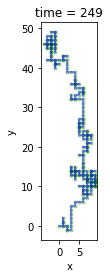

In [1]:
import matplotlib.animation as animation
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt

N = 250 #number of steps
directions = np.array([[0, 1], [1, 0], [0, 1], [-1, 0], [0, -1]]) #biased to move up more often than other directions.
x50 = np.array([[0, 1], [0, 1], [-1, 0], [0, -1]]) #boundary movement at x = 50
negative_x50 = np.array([[0, 1], [1, 0], [0, 1], [0, -1]]) #boundary movement at x = -50
y50 = np.array([[1, 0],[-1, 0], [0, -1]]) #boundary movement at y = 50
negative_y50 = np.array([[0, 1], [1, 0], [0, 1], [-1, 0]]) #boundary movement at y = -50

coords = np.zeros([N, 2])
limit = np.array([-50., 50.])

afig = plt.figure()
plt.gca().set_aspect('equal', adjustable='box')

i = 0
rng = nprand.default_rng()
xy = [0, 0]
x = [0]
y = [0]
d = np.zeros([1, 2])
new_x = np.array([])
new_y = np.array([])
while i < N-1:
    step = rng.choice(directions)
    coords[i] += step
    x = sum(coords[:, 0])
    y = sum(coords[:, 1])
    if x <= limit[0]:
        coords[i] += rng.choice(negative_x50)
        continue
    elif x >= limit[1]:
        coords[i] += rng.choice(x50)
        continue
    elif y <= limit[0]:
        coords[i] += rng.choice(negative_y50)
        continue
    elif y >= limit[1]:
        coords[i] += rng.choice(y50)
        continue
    xy = np.column_stack((x, y))
    d = np.append(d, xy, axis = 0)
    new_x = np.append(new_x, d[i, 0])
    new_y = np.append(new_y, d[i, 1])
    i += 1

def animate(n):
    if n >= 0:
        plt.cla()
        plt.plot(new_x[:n], new_y[:n], 'b-', alpha = 0.5)
        plt.scatter(new_x[:n], new_y[:n], alpha = 0.3, marker = '.', c = 'g')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('time = %d' %n)
 
simulation = animation.FuncAnimation(afig, animate, frames = N, repeat = False)

from IPython.display import HTML
HTML(simulation.to_jshtml())